<a href="https://colab.research.google.com/github/solehin1/plant-disease-detection/blob/main/Single_image_Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Download* the dependencies

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pretrained_model_path = '/content/drive/MyDrive/MM811 AI/Plant Disease Detection Project/plant_disease_model_latest.pt'
disease_info_csv_path = '/content/drive/MyDrive/MM811 AI/Plant Disease Detection Project/disease_info.csv'


In [ ]:
import torch.nn as nn
import torch
import pandas as pd
import numpy as np
from PIL import Image
import torchvision.transforms.functional as TF

##Load Trained Model

In [ ]:

class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # conv1
            nn.Conv2d(in_channels=3, out_channels=32,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # conv2
            nn.Conv2d(in_channels=32, out_channels=64,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            # conv3
            nn.Conv2d(in_channels=64, out_channels=128,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            # conv4
            nn.Conv2d(in_channels=128, out_channels=256,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(50176, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, K),
        )

    def forward(self, X):
        out = self.conv_layers(X)

        # Flatten
        out = out.view(-1, 50176)

        # Fully connected
        out = self.dense_layers(out)

        return out


disease_info = pd.read_csv(disease_info_csv_path, encoding='cp1252')

model = CNN(39)
model.load_state_dict(torch.load(pretrained_model_path))
model.eval()





CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

##Single Image Prediction

In [ ]:
def prediction(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    input_data = TF.to_tensor(image)
    input_data = input_data.view((-1, 3, 224, 224))
    output = model(input_data)
    output = output.detach().numpy()
    index = np.argmax(output)
    return index


def get_prediction(file_path: str):
    pred = prediction(file_path)
    title = disease_info['disease_name'][pred]
    description = disease_info['description'][pred]
    message = """
    Disease Detected: {}
    Description: {}
    """.format(title, description)
    print(message)
    return pred



test_file_path = '/content/drive/MyDrive/MM811 AI/project/Apple_ceder_apple_rust.JPG'
pred = get_prediction(file_path=test_file_path)


    Disease Detected: Apple : Cedar rust
    Description: Cedar apple rust (Gymnosporangium juniperi-virginianae) is a fungal disease that requires juniper plants to complete its complicated two year life-cycle. Spores overwinter as a reddish-brown gall on young twigs of various juniper species. In early spring, during wet weather, these galls swell and bright orange masses of spores are blown by the wind where they infect susceptible apple and crab-apple trees. The spores that develop on these trees will only infect junipers the following year. From year to year, the disease must pass from junipers to apples to junipers again; it cannot spread between apple trees.
    


##Interactive mode Single Image Prediction

In [ ]:
import matplotlib.pyplot as plt

Saving Apple_ceder_apple_rust.JPG to Apple_ceder_apple_rust.JPG

    Disease Detected: Apple : Cedar rust
    Description: Cedar apple rust (Gymnosporangium juniperi-virginianae) is a fungal disease that requires juniper plants to complete its complicated two year life-cycle. Spores overwinter as a reddish-brown gall on young twigs of various juniper species. In early spring, during wet weather, these galls swell and bright orange masses of spores are blown by the wind where they infect susceptible apple and crab-apple trees. The spores that develop on these trees will only infect junipers the following year. From year to year, the disease must pass from junipers to apples to junipers again; it cannot spread between apple trees.
    


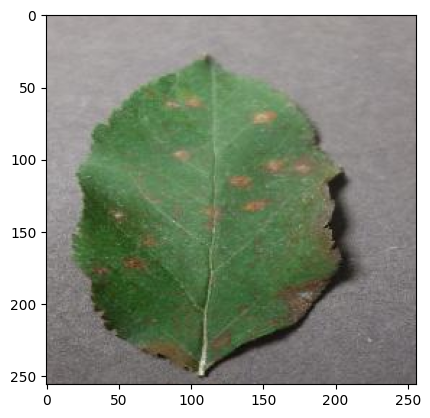

In [ ]:
from google.colab import files
uploaded_file = files.upload()
# print('uploaded_file_path:', uploaded_file.items())
# for k,v in uploaded_file.items():
  # print('k:',k,' v:',v)
# print('k:',len(uploaded_file.keys()))
file_path = list(uploaded_file.keys())[0]
get_prediction(file_path=file_path)

img = plt.imread(file_path)
plt.imshow(img)

##Accuracy on Test images.

In [ ]:
Test_images = pd.read_csv('/content/drive/MyDrive/MM811 AI/project/test_image_disease_info.csv')

In [ ]:
Test_images

,index,FileName
0,16,orange_haunglongbing.JPG
1,6,cherry_powdery_mildew.JPG
2,34,tomato_spider_mites_two_spotted_spider_mites.JPG
3,37,tomato_mosaic_virus.JPG
4,5,blueberry_healthy.JPG
5,13,Grape_esca.JPG
6,28,starwberry_healthy.JPG
7,3,apple_healthy.JPG
8,12,grape_black_rot.JPG
9,30,tomato_early_blight.JPG


In [ ]:
import os
test_images_folder = "/content/drive/MyDrive/MM811 AI/project/test-images/"

n_correct = 0
n_total = len(Test_images)

for i in range(len(Test_images)):
  fname = Test_images.loc[i,'FileName']
  test_file_path = test_images_folder + fname
  index = Test_images.loc[i,'index']

  pred = prediction(test_file_path)
  #print(fname,index,test_file_path,pred)

  n_correct += (pred == index).sum().item()

acc = n_correct / n_total

print("accuracy of the trained model on test set is:",acc)




accuracy of the trained model on test set is: 0.7906976744186046


In [ ]:
acc

0.7906976744186046